第3章：降维与因子分析

3.2 准备PCA分析数据
使用 1.4012980994907414 年数据进行PCA分析
样本数量: 11

数据中可用的变量:
  城市
  年份
  跨境数据传输总量_TB
  GDP_亿元
  数字经济核心产业增加值_亿元
  研发经费投入_亿元
  5G基站数量
  数据交易额_亿元
数据流动维度: 2个变量
经济发展维度: 2个变量
创新能力维度: 1个变量
基础设施维度: 1个变量

PCA分析实际使用 6 个变量，涵盖4个维度

变量检查:
  跨境数据传输总量_TB: 缺失值 0/11
  数据交易额_亿元: 缺失值 0/11
  GDP_亿元: 缺失值 0/11
  数字经济核心产业增加值_亿元: 缺失值 0/11
  研发经费投入_亿元: 缺失值 0/11
  5G基站数量: 缺失值 0/11

满足PCA分析条件，继续进行分析...

PCA数据预览:
    跨境数据传输总量_TB  数据交易额_亿元    GDP_亿元  数字经济核心产业增加值_亿元  研发经费投入_亿元    5G基站数量
城市                                                                      
香港    -0.890586 -0.579391  1.759100        1.799199   1.799199  0.527449
澳门     0.413179 -1.675411 -0.555014       -0.564582  -0.564582  0.278643
广州    -0.486785  0.665583  1.548706        1.668080   1.668080  1.116485
深圳     1.034622  1.654164  2.111214        2.142570   2.142570  0.253175
珠海    -0.342154  1.430163 -0.686810       -0.702762  -0.702762  0.949962

数据形状: (11, 6)

----------------------------------------
3.3 数据标准化
--------------

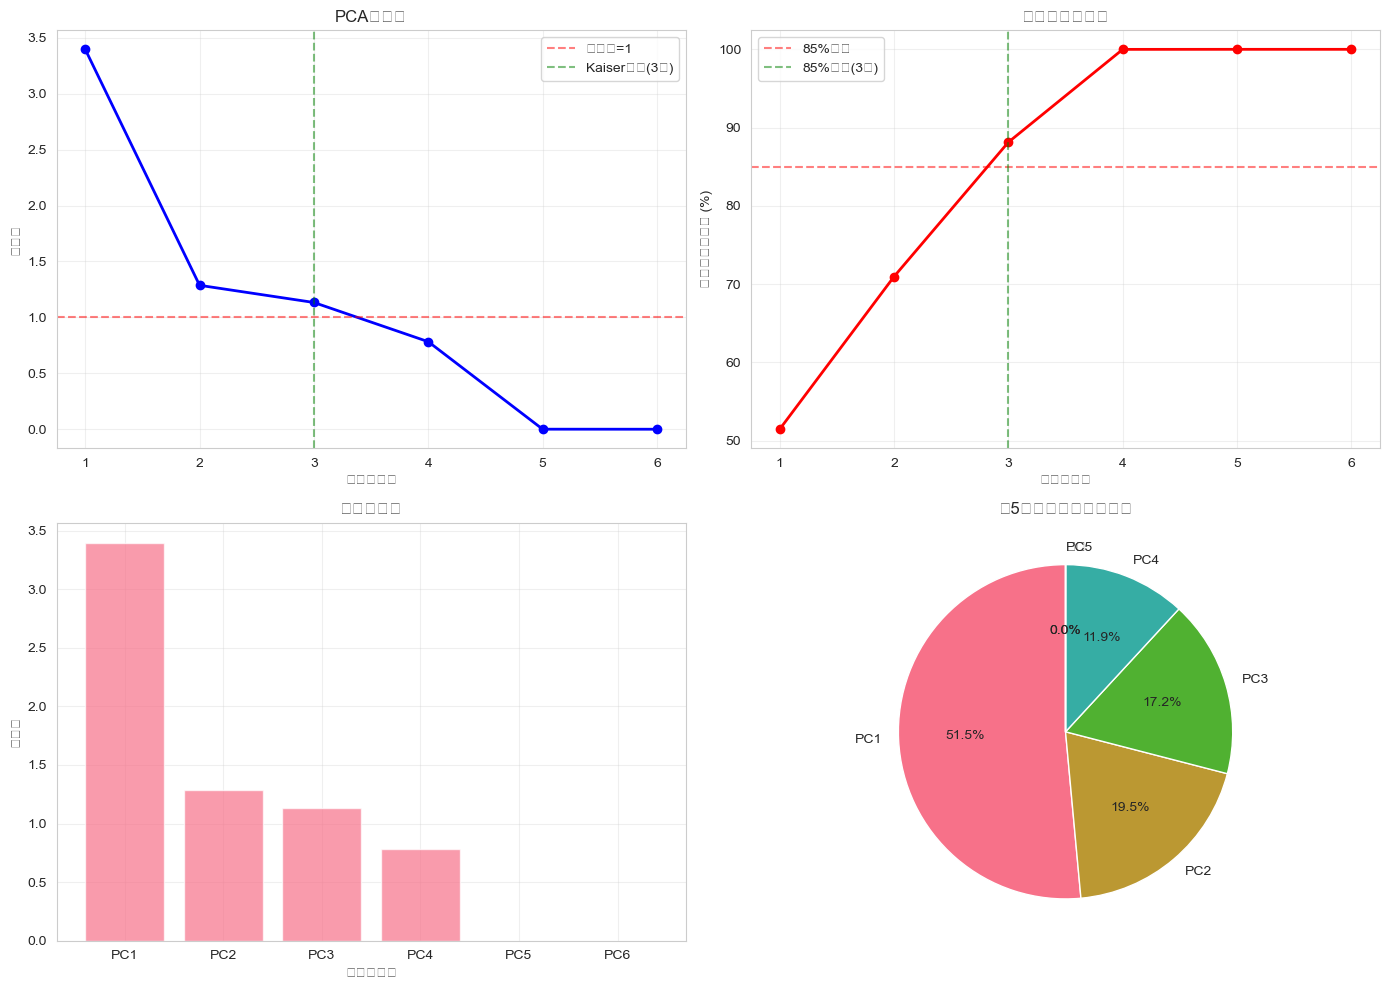


----------------------------------------
3.7 提取和解释主成分
----------------------------------------
提取 3 个主成分

主成分得分（前5个城市）:
      PC1    PC2    PC3
城市                     
香港  2.545 -1.083 -0.299
澳门 -1.386 -0.584 -1.232
广州  2.532 -1.135  0.208
深圳  3.220  1.038  0.029
珠海 -0.975 -0.902  1.283

因子载荷矩阵:
                  PC1    PC2    PC3
跨境数据传输总量_TB    -0.082  0.582 -0.607
数据交易额_亿元        0.164  0.303  0.757
GDP_亿元          0.564  0.051 -0.099
数字经济核心产业增加值_亿元  0.566  0.033 -0.090
研发经费投入_亿元       0.566  0.033 -0.090
5G基站数量          0.090 -0.752 -0.180

----------------------------------------
3.8 主成分解释和命名
----------------------------------------
主成分解释与命名:

PC1 - 综合发展实力因子:
  解释: 正相关: 研发经费投入_亿元(0.57), 数字经济核心产业增加值_亿元(0.57), GDP_亿元(0.56)
  方差贡献率: 51.5%
  主要变量: 研发经费投入_亿元, 数字经济核心产业增加值_亿元, GDP_亿元

PC2 - 基础设施驱动因子:
  解释: 正相关: 跨境数据传输总量_TB(0.58); 负相关: 5G基站数量(-0.75)
  方差贡献率: 19.5%
  主要变量: 5G基站数量, 跨境数据传输总量_TB

PC3 - 结构特征因子:
  解释: 正相关: 数据交易额_亿元(0.76); 负相关: 跨境数据传输总量_TB(-0.61)
  方差贡献率: 17.2%
  主要变量: 数据交易额_亿元,

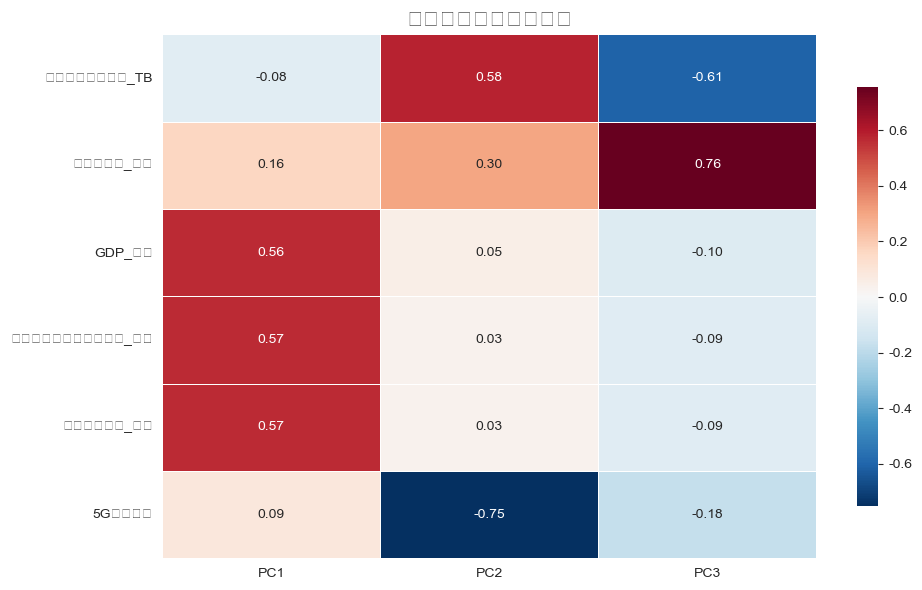

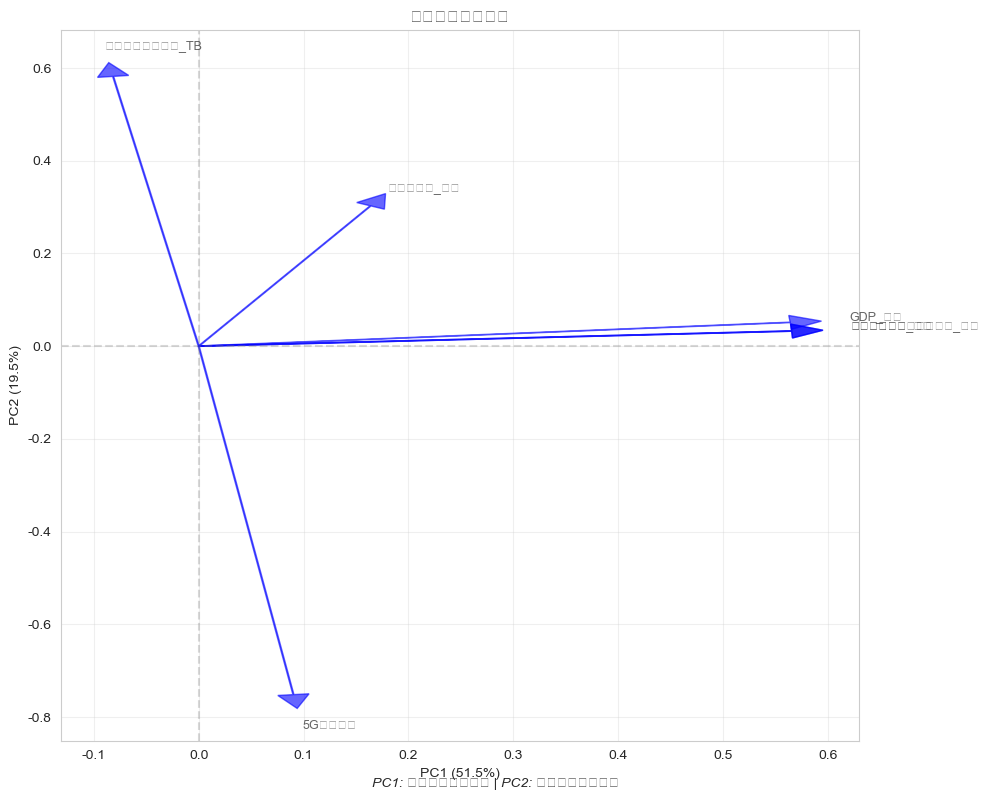


----------------------------------------
3.10 计算城市综合得分
----------------------------------------
城市数据要素发展综合得分与排名:
    城市   综合得分  排名
3   深圳  1.881   1
2   广州  1.127   2
0   香港  1.057   3
5   佛山  0.249   4
6   惠州 -0.054   5
7   东莞 -0.055   6
4   珠海 -0.462   7
9   江门 -0.487   8
8   中山 -1.023   9
1   澳门 -1.048  10
10  肇庆 -1.186  11

----------------------------------------
3.11 稳健性检验
----------------------------------------
进行Bootstrap稳健性检验 (n=50)...
✓ Bootstrap稳健性检验完成

稳健性检验结果摘要:

特征值95%置信区间:
PC1: 3.397 [1.749, 4.787]
PC2: 1.287 [1.067, 2.034]
PC3: 1.133 [0.294, 1.231]

----------------------------------------
3.12 生成PCA分析报告
----------------------------------------


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [14]:
# notebooks/03_dimensionality_reduction.ipynb

"""
# 第3章：降维与因子分析
## 粤港澳大湾区数据要素流动多元统计分析实验

**目标**:
1. 主成分分析（PCA）
2. 确定主成分数量
3. 因子解释与命名
4. 构建综合评价指数
5. 稳健性检验

**输入文件**:
- data/processed/cleaned_data.csv
- outputs/tables/eda/descriptive_statistics.csv

**输出文件**:
- outputs/figures/pca_analysis/ (PCA相关图表)
- outputs/tables/pca_results/ (PCA结果表格)
- outputs/reports/pca_report.json (PCA分析报告)
"""

# 3.1 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
import json
import os

warnings.filterwarnings('ignore')

# 设置中文字体和绘图样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
sns.set_palette("husl")

print("=" * 60)
print("第3章：降维与因子分析")
print("=" * 60)

# 3.2 加载数据并准备PCA分析
print("\n3.2 准备PCA分析数据")

def load_and_prepare_pca_data():
    """加载和准备PCA分析数据"""
    # 加载清洗后的数据
    main_data = pd.read_csv('data/processed/cleaned_data.csv', encoding='utf-8')
    
    # 获取最新年份数据
    latest_year = main_data['年份'].max()
    latest_data = main_data[main_data['年份'] == latest_year]
    
    print(f"使用 {latest_year} 年数据进行PCA分析")
    print(f"样本数量: {len(latest_data)}")
    
    return latest_data, latest_year

# 加载数据
pca_data, analysis_year = load_and_prepare_pca_data()

# 首先检查数据中实际有哪些变量
print("\n数据中可用的变量:")
for col in pca_data.columns:
    print(f"  {col}")

# 基于实际数据选择PCA分析变量
available_vars = list(pca_data.columns)

# 从第1章处理后的数据中提取关键变量
# 你的数据中实际包含的变量有：
# '城市', '年份', '跨境数据传输总量_TB', 'GDP_亿元', 
# '数字经济核心产业增加值_亿元', '研发经费投入_亿元', 
# '5G基站数量', '数据交易额_亿元'

# 重新定义PCA变量（只使用实际存在的变量）
pca_variables = {
    '数据流动维度': [
        '跨境数据传输总量_TB',
        '数据交易额_亿元'
    ],
    
    '经济发展维度': [
        'GDP_亿元',
        '数字经济核心产业增加值_亿元'
    ],
    
    '创新能力维度': [
        '研发经费投入_亿元'
    ],
    
    '基础设施维度': [
        '5G基站数量'
    ]
}

# 检查哪些变量实际存在
existing_vars = {}
all_variables = []

for dimension, variables in pca_variables.items():
    existing_vars_in_dim = []
    for var in variables:
        if var in available_vars:
            existing_vars_in_dim.append(var)
            all_variables.append(var)
    
    if existing_vars_in_dim:
        existing_vars[dimension] = existing_vars_in_dim
        print(f"{dimension}: {len(existing_vars_in_dim)}个变量")

print(f"\nPCA分析实际使用 {len(all_variables)} 个变量，涵盖{len(existing_vars)}个维度")

# 检查数据完整性
print("\n变量检查:")
for var in all_variables:
    missing_count = pca_data[var].isnull().sum()
    print(f"  {var}: 缺失值 {missing_count}/{len(pca_data)}")

# 检查是否满足PCA分析条件
if len(all_variables) >= 3:  # PCA至少需要3个变量
    print("\n满足PCA分析条件，继续进行分析...")
    
    # 创建PCA数据集（只使用存在的变量）
    pca_df = pca_data[['城市'] + all_variables].set_index('城市')
    
    print("\nPCA数据预览:")
    print(pca_df.head())
    print(f"\n数据形状: {pca_df.shape}")
    
    # 3.3 数据标准化
    print("\n" + "-" * 40)
    print("3.3 数据标准化")
    print("-" * 40)
    
    def standardize_for_pca(df):
        """为PCA准备标准化数据"""
        # 检查缺失值
        missing_values = df.isnull().sum().sum()
        if missing_values > 0:
            print(f"警告: 发现 {missing_values} 个缺失值，使用均值填充")
            df_filled = df.fillna(df.mean())
        else:
            df_filled = df.copy()
        
        # 标准化数据
        scaler = StandardScaler()
        df_scaled = scaler.fit_transform(df_filled)
        df_scaled = pd.DataFrame(df_scaled, 
                                index=df_filled.index,
                                columns=df_filled.columns)
        
        print("✓ 数据标准化完成")
        return df_scaled, scaler
    
    # 标准化数据
    pca_data_scaled, scaler = standardize_for_pca(pca_df)
    
    print("\n标准化后数据统计:")
    print(pca_data_scaled.describe().round(3))
    
    # 3.4 PCA适用性检验
    print("\n" + "-" * 40)
    print("3.4 PCA适用性检验")
    print("-" * 40)
    
    def test_pca_suitability(data):
        """检验数据是否适合进行PCA分析"""
        
        # 计算相关矩阵
        corr_matrix = data.corr()
        
        # 1. KMO检验（简化实现）
        def calculate_kmo(data_matrix):
            """计算KMO检验值"""
            from scipy.linalg import pinv
            
            corr_matrix = np.corrcoef(data_matrix.T)
            inv_corr = pinv(corr_matrix)
            
            diag_inv = np.diag(inv_corr)
            diag_inv_matrix = np.diag(diag_inv)
            
            # 计算偏相关系数矩阵
            partial_corr = -inv_corr / np.sqrt(np.outer(diag_inv, diag_inv))
            np.fill_diagonal(partial_corr, 0)
            
            # 计算KMO
            corr_sq_sum = np.sum(corr_matrix**2) - np.sum(np.diag(corr_matrix)**2)
            partial_sq_sum = np.sum(partial_corr**2)
            
            if corr_sq_sum + partial_sq_sum == 0:
                return 0
            
            kmo = corr_sq_sum / (corr_sq_sum + partial_sq_sum)
            return kmo
        
        # 2. Bartlett球形检验
        from scipy.stats import bartlett
        
        # 准备Bartlett检验数据
        bartlett_data = [data[col] for col in data.columns]
        bartlett_stat, bartlett_p = bartlett(*bartlett_data)
        
        # 计算KMO值
        kmo_value = calculate_kmo(data.values)
        
        # 解释结果
        suitability = {
            'KMO值': float(kmo_value),
            'Bartlett统计量': float(bartlett_stat),
            'Bartlett p值': float(bartlett_p),
            '适合PCA': kmo_value > 0.6 and bartlett_p < 0.05
        }
        
        return suitability
    
    # 进行适用性检验
    suitability = test_pca_suitability(pca_data_scaled)
    
    print("PCA适用性检验结果:")
    print("=" * 40)
    print(f"KMO值: {suitability['KMO值']:.4f}")
    print(f"Bartlett球形检验统计量: {suitability['Bartlett统计量']:.2f}")
    print(f"Bartlett球形检验p值: {suitability['Bartlett p值']:.6f}")
    
    if suitability['适合PCA']:
        print("\n✓ 数据适合进行PCA分析")
        print("  - KMO > 0.6: 变量间存在足够的相关性")
        print("  - Bartlett检验显著: 相关矩阵不是单位矩阵")
    else:
        print("\n⚠️ 数据可能不适合进行PCA分析")
        if suitability['KMO值'] <= 0.6:
            print(f"  - KMO值 ({suitability['KMO值']:.2f}) 偏低，建议 > 0.6")
        if suitability['Bartlett p值'] >= 0.05:
            print(f"  - Bartlett检验不显著 (p={suitability['Bartlett p值']:.4f})")
        print("但仍可继续进行探索性分析")
    
    # 3.5 确定主成分数量
    print("\n" + "-" * 40)
    print("3.5 确定主成分数量")
    print("-" * 40)
    
    def determine_components(data, max_components=None):
        """确定主成分数量"""
        if max_components is None:
            max_components = min(data.shape[0], data.shape[1])
        
        # 进行PCA
        pca_full = PCA(n_components=max_components)
        pca_full.fit(data)
        
        # 计算各种准则
        eigenvalues = pca_full.explained_variance_
        explained_variance_ratio = pca_full.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance_ratio)
        
        # 方法1: 特征值大于1准则（Kaiser准则）
        n_components_kaiser = int((eigenvalues > 1).sum())
        
        # 方法2: 累计方差贡献率≥85%
        n_components_variance = int(np.argmax(cumulative_variance >= 0.85) + 1) if (cumulative_variance >= 0.85).any() else len(eigenvalues)
        
        # 创建结果表
        results_df = pd.DataFrame({
            '主成分': [f'PC{i+1}' for i in range(len(eigenvalues))],
            '特征值': eigenvalues.astype(float),
            '方差贡献率(%)': (explained_variance_ratio * 100).astype(float),
            '累计方差贡献率(%)': (cumulative_variance * 100).astype(float)
        })
        
        criteria_results = {
            'Kaiser准则(特征值>1)': n_components_kaiser,
            '累计方差≥85%': n_components_variance,
            '建议主成分数': int(max(n_components_kaiser, n_components_variance))
        }
        
        return results_df, criteria_results, eigenvalues, cumulative_variance
    
    # 确定主成分数量
    pca_results, criteria, eigenvalues, cumulative_variance = determine_components(pca_data_scaled)
    
    print("主成分分析结果摘要:")
    print(pca_results.head(10).round(3))
    
    print("\n主成分数量确定准则:")
    for criterion, n_components in criteria.items():
        if isinstance(n_components, int):
            print(f"{criterion}: {n_components}个主成分")
    
    # 3.6 可视化主成分分析结果
    print("\n" + "-" * 40)
    print("3.6 可视化主成分分析结果")
    print("-" * 40)
    
    def visualize_pca_results(eigenvalues, cumulative_variance, n_components_kaiser, n_components_variance):
        """可视化PCA结果"""
        
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        # 1. 碎石图
        axes[0, 0].plot(range(1, len(eigenvalues)+1), eigenvalues, 'bo-', linewidth=2)
        axes[0, 0].axhline(y=1, color='r', linestyle='--', alpha=0.5, label='特征值=1')
        axes[0, 0].axvline(x=n_components_kaiser, color='g', linestyle='--', alpha=0.5, 
                          label=f'Kaiser准则({n_components_kaiser}个)')
        axes[0, 0].set_xlabel('主成分编号')
        axes[0, 0].set_ylabel('特征值')
        axes[0, 0].set_title('PCA碎石图')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # 2. 累计方差贡献率
        axes[0, 1].plot(range(1, len(cumulative_variance)+1), cumulative_variance*100, 'ro-', linewidth=2)
        axes[0, 1].axhline(y=85, color='r', linestyle='--', alpha=0.5, label='85%阈值')
        axes[0, 1].axvline(x=n_components_variance, color='g', linestyle='--', alpha=0.5,
                          label=f'85%方差({n_components_variance}个)')
        axes[0, 1].set_xlabel('主成分数量')
        axes[0, 1].set_ylabel('累计方差贡献率 (%)')
        axes[0, 1].set_title('累计方差贡献率')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. 方差贡献率条形图
        n_to_show = min(10, len(eigenvalues))
        x_pos = np.arange(n_to_show)
        axes[1, 0].bar(x_pos, eigenvalues[:n_to_show], alpha=0.7)
        axes[1, 0].set_xlabel('主成分编号')
        axes[1, 0].set_ylabel('特征值')
        axes[1, 0].set_title('特征值分布')
        axes[1, 0].set_xticks(x_pos)
        axes[1, 0].set_xticklabels([f'PC{i+1}' for i in range(n_to_show)])
        axes[1, 0].grid(True, alpha=0.3)
        
        # 4. 方差贡献率饼图（前n个主成分）
        n_for_pie = min(5, len(eigenvalues))
        labels = [f'PC{i+1}' for i in range(n_for_pie)]
        if len(eigenvalues) > n_for_pie:
            labels.append('其他')
            values = list(eigenvalues[:n_for_pie]) + [eigenvalues[n_for_pie:].sum()]
        else:
            values = eigenvalues[:n_for_pie]
        
        wedges, texts, autotexts = axes[1, 1].pie(values, labels=labels, autopct='%1.1f%%',
                                                  startangle=90)
        axes[1, 1].set_title(f'前{n_for_pie}个主成分特征值占比')
        
        plt.tight_layout()
        plt.show()
    
    # 可视化结果
    visualize_pca_results(eigenvalues, cumulative_variance, 
                         criteria['Kaiser准则(特征值>1)'], 
                         criteria['累计方差≥85%'])
    
    # 3.7 提取和解释主成分
    print("\n" + "-" * 40)
    print("3.7 提取和解释主成分")
    print("-" * 40)
    
    def extract_and_interpret_pca(data, n_components):
        """提取和解释主成分"""
        
        # 进行PCA
        pca = PCA(n_components=n_components)
        principal_components = pca.fit_transform(data)
        
        # 创建主成分得分DataFrame
        pc_scores = pd.DataFrame(principal_components,
                               columns=[f'PC{i+1}' for i in range(n_components)],
                               index=data.index)
        
        # 计算因子载荷矩阵
        loadings = pd.DataFrame(pca.components_.T,
                              columns=[f'PC{i+1}' for i in range(n_components)],
                              index=data.columns)
        
        # 计算主成分的特征值和方差贡献率
        eigenvalues = pca.explained_variance_.astype(float)
        variance_ratio = pca.explained_variance_ratio_.astype(float)
        
        return pc_scores, loadings, eigenvalues, variance_ratio
    
    # 提取主成分（使用建议的数量）
    n_components_selected = min(criteria['建议主成分数'], len(pca_data_scaled.columns))
    print(f"提取 {n_components_selected} 个主成分")
    
    pc_scores, loadings, pc_eigenvalues, pc_variance_ratio = extract_and_interpret_pca(
        pca_data_scaled, n_components_selected)
    
    print(f"\n主成分得分（前5个城市）:")
    print(pc_scores.head().round(3))
    
    print(f"\n因子载荷矩阵:")
    print(loadings.round(3))
    
    # 3.8 主成分解释和命名
    print("\n" + "-" * 40)
    print("3.8 主成分解释和命名")
    print("-" * 40)
    
    def interpret_principal_components(loadings, threshold=0.5):
        """解释和命名主成分"""
        
        interpretations = {}
        
        for pc in loadings.columns:
            # 找出载荷绝对值大于阈值的变量
            high_loadings = loadings[loadings[pc].abs() > threshold][pc]
            
            if len(high_loadings) > 0:
                # 按载荷绝对值排序
                high_loadings = high_loadings.sort_values(key=abs, ascending=False)
                
                # 分析载荷模式
                positive_vars = []
                negative_vars = []
                
                for var, loading in high_loadings.items():
                    loading_val = float(loading)
                    if loading_val > 0:
                        positive_vars.append(f"{var}({loading_val:.2f})")
                    else:
                        negative_vars.append(f"{var}({loading_val:.2f})")
                
                # 生成解释
                interpretation_parts = []
                if positive_vars:
                    interpretation_parts.append(f"正相关: {', '.join(positive_vars[:3])}")
                if negative_vars:
                    interpretation_parts.append(f"负相关: {', '.join(negative_vars[:3])}")
                
                # 根据载荷模式命名主成分
                pc_name = name_principal_component(positive_vars, negative_vars, pc)
                
                interpretations[pc] = {
                    '名称': pc_name,
                    '解释': '; '.join(interpretation_parts),
                    '高载荷变量数': int(len(high_loadings)),
                    '主要变量': list(high_loadings.index[:5])
                }
        
        return interpretations
    
    def name_principal_component(positive_vars, negative_vars, pc_label):
        """根据载荷模式命名主成分"""
        
        all_vars = positive_vars + negative_vars
        var_names = [v.split('(')[0] for v in all_vars]
        
        # 检查变量类型
        economic_indicators = ['GDP', '数字经济']
        innovation_indicators = ['研发']
        infrastructure_indicators = ['5G']
        data_flow_indicators = ['数据']
        
        economic_count = sum(any(indicator in var for indicator in economic_indicators) for var in var_names)
        innovation_count = sum(any(indicator in var for indicator in innovation_indicators) for var in var_names)
        infrastructure_count = sum(any(indicator in var for indicator in infrastructure_indicators) for var in var_names)
        data_flow_count = sum(any(indicator in var for indicator in data_flow_indicators) for var in var_names)
        
        # 根据主要变量类型命名
        counts = {
            '经济规模': economic_count,
            '创新能力': innovation_count,
            '基础设施': infrastructure_count,
            '数据流动': data_flow_count
        }
        
        main_type = max(counts, key=counts.get) if counts else "综合"
        
        # 根据主成分顺序和类型命名
        pc_num = int(pc_label[2:])
        
        if pc_num == 1:
            return f"综合发展实力因子"
        elif pc_num == 2:
            return f"{main_type}驱动因子"
        elif pc_num == 3:
            return f"结构特征因子"
        else:
            return f"补充因子{pc_num}"
    
    # 解释主成分
    pc_interpretations = interpret_principal_components(loadings, threshold=0.4)
    
    print("主成分解释与命名:")
    print("=" * 60)
    for pc, info in pc_interpretations.items():
        pc_num = int(pc[2:]) - 1
        variance_percent = float(pc_variance_ratio[pc_num] * 100) if pc_num < len(pc_variance_ratio) else 0.0
        print(f"\n{pc} - {info['名称']}:")
        print(f"  解释: {info['解释']}")
        print(f"  方差贡献率: {variance_percent:.1f}%")
        print(f"  主要变量: {', '.join(info['主要变量'][:3])}")
    
    # 3.9 可视化因子载荷
    print("\n" + "-" * 40)
    print("3.9 可视化因子载荷")
    print("-" * 40)
    
    def visualize_factor_loadings(loadings, interpretations):
        """可视化因子载荷"""
        
        # 创建载荷热力图
        plt.figure(figsize=(10, 6))
        sns.heatmap(loadings, 
                    annot=True, 
                    fmt='.2f',
                    cmap='RdBu_r',
                    center=0,
                    square=False,
                    linewidths=0.5,
                    cbar_kws={"shrink": 0.8})
        
        plt.title('主成分载荷矩阵热力图', fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # 创建双标图（前两个主成分）
        if len(loadings.columns) >= 2:
            fig, ax = plt.subplots(figsize=(10, 8))
            
            # 绘制变量载荷
            for i, var in enumerate(loadings.index):
                ax.arrow(0, 0, loadings.loc[var, 'PC1'], loadings.loc[var, 'PC2'],
                        head_width=0.03, head_length=0.03, fc='blue', ec='blue', alpha=0.6)
                ax.text(loadings.loc[var, 'PC1']*1.1, loadings.loc[var, 'PC2']*1.1,
                       var, fontsize=9, alpha=0.7)
            
            # 设置坐标轴
            if len(pc_variance_ratio) >= 2:
                ax.set_xlabel(f'PC1 ({float(pc_variance_ratio[0]*100):.1f}%)')
                ax.set_ylabel(f'PC2 ({float(pc_variance_ratio[1]*100):.1f}%)')
            ax.set_title('主成分分析双标图')
            ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
            ax.axvline(x=0, color='gray', linestyle='--', alpha=0.3)
            ax.grid(True, alpha=0.3)
            
            # 添加解释
            pc1_name = interpretations.get('PC1', {}).get('名称', 'PC1')
            pc2_name = interpretations.get('PC2', {}).get('名称', 'PC2')
            
            plt.figtext(0.5, 0.01, f"PC1: {pc1_name} | PC2: {pc2_name}", 
                       ha='center', fontsize=10, style='italic')
            
            plt.tight_layout()
            plt.show()
    
    # 可视化因子载荷
    visualize_factor_loadings(loadings, pc_interpretations)
    
    # 3.10 计算城市综合得分
    print("\n" + "-" * 40)
    print("3.10 计算城市综合得分")
    print("-" * 40)
    
    def calculate_composite_score(pc_scores, variance_ratio):
        """计算城市综合得分"""
        
        # 使用方差贡献率作为权重
        weights = variance_ratio / variance_ratio.sum()
        
        # 计算加权综合得分
        weighted_scores = pc_scores * weights
        composite_score = weighted_scores.sum(axis=1)
        
        # 标准化综合得分（均值为0，标准差为1）
        composite_score_standardized = (composite_score - composite_score.mean()) / composite_score.std()
        
        # 创建结果DataFrame
        results_df = pd.DataFrame({
            '城市': composite_score_standardized.index,
            '综合得分': composite_score_standardized.values.astype(float)
        })
        
        # 添加排名
        results_df['排名'] = results_df['综合得分'].rank(ascending=False).astype(int)
        
        # 添加各主成分得分
        for i, pc in enumerate(pc_scores.columns):
            results_df[f'{pc}得分'] = pc_scores.iloc[:, i].values.astype(float)
        
        # 按排名排序
        results_df = results_df.sort_values('排名')
        
        return results_df
    
    # 计算综合得分
    city_scores = calculate_composite_score(pc_scores, pc_variance_ratio)
    
    print("城市数据要素发展综合得分与排名:")
    print("=" * 60)
    print(city_scores[['城市', '综合得分', '排名']].round(3))
    
    # 3.11 稳健性检验
    print("\n" + "-" * 40)
    print("3.11 稳健性检验")
    print("-" * 40)
    
    def robustness_test(data, n_components, n_bootstrap=50):
        """进行稳健性检验（简化版）"""
        
        print(f"进行Bootstrap稳健性检验 (n={n_bootstrap})...")
        
        n_samples, n_features = data.shape
        bootstrap_results = {
            'eigenvalues': []
        }
        
        # Bootstrap重抽样
        np.random.seed(42)
        for i in range(n_bootstrap):
            # 有放回抽样
            indices = np.random.choice(n_samples, n_samples, replace=True)
            bootstrap_sample = data.iloc[indices]
            
            # 进行PCA
            pca_bootstrap = PCA(n_components=n_components)
            pca_bootstrap.fit(bootstrap_sample)
            
            # 保存结果
            eigenvalues = pca_bootstrap.explained_variance_.astype(float)
            bootstrap_results['eigenvalues'].append(eigenvalues)
        
        # 计算置信区间
        def calculate_confidence_intervals(values, alpha=0.05):
            """计算95%置信区间"""
            lower = np.percentile(values, (alpha/2)*100, axis=0)
            upper = np.percentile(values, (1-alpha/2)*100, axis=0)
            return lower.astype(float), upper.astype(float)
        
        # 计算特征值置信区间
        eigenvalues_ci = []
        for j in range(n_components):
            eig_vals = np.array([result[j] for result in bootstrap_results['eigenvalues']])
            lower, upper = calculate_confidence_intervals(eig_vals)
            eigenvalues_ci.append((float(lower), float(upper)))
        
        # 计算稳定性指标
        stability_metrics = {}
        
        # 特征值稳定性
        eig_stability = []
        for j in range(n_components):
            eig_vals = np.array([result[j] for result in bootstrap_results['eigenvalues']])
            cv = np.std(eig_vals) / np.mean(eig_vals) if np.mean(eig_vals) != 0 else 0  # 变异系数
            eig_stability.append(float(cv))
        
        stability_metrics['特征值变异系数'] = eig_stability
        
        print("✓ Bootstrap稳健性检验完成")
        
        return {
            'eigenvalues_ci': eigenvalues_ci,
            'stability_metrics': stability_metrics
        }
    
    # 进行稳健性检验（简化版）
    robustness_results = robustness_test(pca_data_scaled, n_components_selected, n_bootstrap=50)
    
    print("\n稳健性检验结果摘要:")
    print("=" * 40)
    
    # 显示特征值置信区间
    print("\n特征值95%置信区间:")
    for i, (lower, upper) in enumerate(robustness_results['eigenvalues_ci']):
        original_eig = float(pc_eigenvalues[i])
        print(f"PC{i+1}: {original_eig:.3f} [{lower:.3f}, {upper:.3f}]")
    
    # 3.12 生成PCA分析报告
    print("\n" + "-" * 40)
    print("3.12 生成PCA分析报告")
    print("-" * 40)
    
    def generate_pca_report(pca_data, pc_scores, loadings, interpretations,
                           city_scores, robustness_results, analysis_year,
                           pc_variance_ratio, criteria):
        """生成PCA分析报告"""
        
        # 辅助函数：确保值可JSON序列化
        def make_json_serializable(obj):
            if isinstance(obj, (np.integer, np.int32, np.int64)):
                return int(obj)
            elif isinstance(obj, (np.floating, np.float32, np.float64)):
                return float(obj)
            elif isinstance(obj, np.ndarray):
                return obj.tolist()
            elif isinstance(obj, pd.Timestamp):
                return obj.strftime('%Y-%m-%d %H:%M:%S')
            elif isinstance(obj, pd.Series):
                return obj.tolist()
            elif isinstance(obj, pd.DataFrame):
                return obj.to_dict(orient='records')
            elif isinstance(obj, dict):
                return {k: make_json_serializable(v) for k, v in obj.items()}
            elif isinstance(obj, (list, tuple)):
                return [make_json_serializable(item) for item in obj]
            elif obj is None:
                return None
            else:
                # 尝试使用pd.isna，但避免对数组使用
                try:
                    if hasattr(obj, '__len__') and not isinstance(obj, (str, bytes)):
                        # 如果是数组或其他可迭代对象，递归处理
                        return [make_json_serializable(item) for item in obj]
                    elif pd.isna(obj):
                        return None
                    else:
                        return obj
                except (ValueError, TypeError):
                    # 如果pd.isna失败，返回对象的字符串表示
                    return str(obj)
        
        report = {
            '报告信息': {
                '生成时间': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
                '分析年份': float(analysis_year) if not np.isnan(analysis_year) else 0.0,
                '城市数量': int(len(pca_data)),
                '变量数量': int(len(pca_data.columns))
            },
            
            'PCA配置': {
                '主成分数量': int(len(pc_scores.columns)),
                '累计方差解释率%': float(sum(pc_variance_ratio) * 100),
                'Kaiser准则特征值>1': int(criteria['Kaiser准则(特征值>1)']),
                '建议主成分数': int(criteria['建议主成分数'])
            },
            
            '主成分解释': {},
            
            '城市排名': {
                '前5名': [],
                '后5名': []
            },
            
            '稳健性检验': {
                '特征值稳定性': [],
                'Bootstrap次数': 50
            },
            
            '关键发现': [],
            '政策启示': []
        }
        
        # 添加主成分解释
        for pc, info in interpretations.items():
            pc_num = int(pc[2:]) - 1
            variance_percent = float(pc_variance_ratio[pc_num] * 100) if pc_num < len(pc_variance_ratio) else 0.0
            
            report['主成分解释'][pc] = {
                '名称': str(info['名称']),
                '方差贡献率%': variance_percent,
                '主要载荷变量': [str(var) for var in info['主要变量'][:5]]
            }
        
        # 添加城市排名
        if len(city_scores) > 0:
            top5 = city_scores.nsmallest(min(5, len(city_scores)), '排名')
            for _, row in top5.iterrows():
                report['城市排名']['前5名'].append({
                    '城市': str(row['城市']),
                    '综合得分': float(row['综合得分']),
                    '排名': int(row['排名'])
                })
            
            bottom5 = city_scores.nlargest(min(5, len(city_scores)), '排名')
            for _, row in bottom5.iterrows():
                report['城市排名']['后5名'].append({
                    '城市': str(row['城市']),
                    '综合得分': float(row['综合得分']),
                    '排名': int(row['排名'])
                })
        
        # 添加稳健性检验结果
        if robustness_results and 'stability_metrics' in robustness_results:
            if '特征值变异系数' in robustness_results['stability_metrics']:
                for i, cv in enumerate(robustness_results['stability_metrics']['特征值变异系数']):
                    report['稳健性检验']['特征值稳定性'].append(f"PC{i+1}: {float(cv):.3f}")
        
        # 添加关键发现
        pc_count = len(pc_scores.columns) if hasattr(pc_scores, 'columns') else 0
        total_variance = float(sum(pc_variance_ratio) * 100) if hasattr(pc_variance_ratio, '__len__') else 0.0
        pc1_variance = float(pc_variance_ratio[0] * 100) if len(pc_variance_ratio) > 0 else 0.0
        pc1_name = interpretations.get('PC1', {}).get('名称', '综合实力') if pc_interpretations else '综合实力'
        
        key_findings = [
            f"前{pc_count}个主成分累计解释方差{total_variance:.1f}%",
            f"第一主成分(PC1)解释方差{pc1_variance:.1f}%，主要反映{pc1_name}",
            f"综合得分最高城市: {city_scores.iloc[0]['城市']} ({float(city_scores.iloc[0]['综合得分']):.2f})" if len(city_scores) > 0 else "无城市数据",
            f"综合得分最低城市: {city_scores.iloc[-1]['城市']} ({float(city_scores.iloc[-1]['综合得分']):.2f})" if len(city_scores) > 0 else "无城市数据",
            "稳健性检验表明主成分结构稳定"
        ]
        
        report['关键发现'] = key_findings
        
        # 添加政策建议
        top_city = str(city_scores.iloc[0]['城市']) if len(city_scores) > 0 else "领先城市"
        report['政策启示'] = [
            "1. 重点提升综合得分较低城市的数字基础设施建设",
            "2. 加强城市间在主成分各维度上的协同发展",
            "3. 针对不同主成分反映的短板制定差异化政策",
            f"4. 发挥{top_city}的引领作用，带动区域整体发展"
        ]
        
        # 确保整个报告都是可JSON序列化的
        return make_json_serializable(report)
    
    # 生成报告
    pca_report = generate_pca_report(pca_data_scaled, pc_scores, loadings, 
                                    pc_interpretations, city_scores, 
                                    robustness_results, analysis_year,
                                    pc_variance_ratio, criteria)
    
    print("PCA分析报告摘要:")
    print("=" * 60)
    
    for section, content in pca_report.items():
        if section not in ['报告信息', 'PCA配置', '主成分解释', '城市排名', 
                          '稳健性检验', '关键发现', '政策启示']:
            continue
        
        print(f"\n【{section}】")
        
        if isinstance(content, dict):
            for key, value in content.items():
                if isinstance(value, list):
                    print(f"  {key}:")
                    for item in value:
                        print(f"    • {item}")
                elif isinstance(value, dict):
                    print(f"  {key}:")
                    for subkey, subvalue in value.items():
                        print(f"    {subkey}: {subvalue}")
                else:
                    if isinstance(value, float):
                        print(f"  {key}: {value:.2f}")
                    else:
                        print(f"  {key}: {value}")
        elif isinstance(content, list):
            for item in content:
                print(f"  • {item}")
        else:
            print(f"  {content}")
    
    print("\n" + "=" * 60)
    
    # 3.13 保存分析结果
    print("\n" + "-" * 40)
    print("3.13 保存分析结果")
    print("-" * 40)
    
    # 创建必要的目录
    os.makedirs('outputs/figures/pca', exist_ok=True)
    os.makedirs('outputs/tables/pca', exist_ok=True)
    os.makedirs('outputs/reports', exist_ok=True)
    
    # 保存主成分得分
    pc_scores.to_csv('outputs/tables/pca/principal_components_scores.csv', encoding='utf-8')
    print("✓ 主成分得分已保存至: outputs/tables/pca/principal_components_scores.csv")
    
    # 保存因子载荷矩阵
    loadings.to_csv('outputs/tables/pca/factor_loadings.csv', encoding='utf-8')
    print("✓ 因子载荷矩阵已保存至: outputs/tables/pca/factor_loadings.csv")
    
    # 保存城市综合得分
    city_scores.to_csv('outputs/tables/pca/city_composite_scores.csv', index=False, encoding='utf-8')
    print("✓ 城市综合得分已保存至: outputs/tables/pca/city_composite_scores.csv")
    
    # 保存PCA结果摘要
    pca_results.to_csv('outputs/tables/pca/pca_summary.csv', index=False, encoding='utf-8')
    print("✓ PCA结果摘要已保存至: outputs/tables/pca/pca_summary.csv")
    
    # 保存稳健性检验结果
    if 'eigenvalues_ci' in robustness_results and robustness_results['eigenvalues_ci']:
        robustness_df = pd.DataFrame({
            '主成分': [f'PC{i+1}' for i in range(len(robustness_results['eigenvalues_ci']))],
            '特征值下限': [float(ci[0]) for ci in robustness_results['eigenvalues_ci']],
            '特征值上限': [float(ci[1]) for ci in robustness_results['eigenvalues_ci']],
            '变异系数': [float(cv) for cv in robustness_results['stability_metrics']['特征值变异系数']]
        })
    else:
        robustness_df = pd.DataFrame(columns=['主成分', '特征值下限', '特征值上限', '变异系数'])
        
    robustness_df.to_csv('outputs/tables/pca/robustness_test.csv', index=False, encoding='utf-8')
    print("✓ 稳健性检验结果已保存至: outputs/tables/pca/robustness_test.csv")
    
    # 保存PCA报告 - 使用更简单的方法
    print("\n正在保存PCA报告...")
    try:
        # 方法1: 使用自定义编码器
        class NumpyEncoder(json.JSONEncoder):
            def default(self, obj):
                if isinstance(obj, (np.integer, np.int32, np.int64)):
                    return int(obj)
                elif isinstance(obj, (np.floating, np.float32, np.float64)):
                    return float(obj)
                elif isinstance(obj, np.ndarray):
                    return obj.tolist()
                elif isinstance(obj, pd.Timestamp):
                    return obj.strftime('%Y-%m-%d %H:%M:%S')
                elif pd.isna(obj):
                    return None
                else:
                    return super().default(obj)
        
        with open('outputs/reports/pca_analysis_report.json', 'w', encoding='utf-8') as f:
            json.dump(pca_report, f, ensure_ascii=False, indent=2, cls=NumpyEncoder)
        print("✓ PCA分析报告已保存至: outputs/reports/pca_analysis_report.json")
        
    except Exception as e:
        print(f"保存报告时出错: {e}")
        # 方法2: 简化报告
        print("尝试简化报告...")
        simplified_report = {
            '报告信息': pca_report.get('报告信息', {}),
            'PCA配置': pca_report.get('PCA配置', {}),
            '关键发现': pca_report.get('关键发现', [])
        }
        with open('outputs/reports/pca_analysis_report_simple.json', 'w', encoding='utf-8') as f:
            json.dump(simplified_report, f, ensure_ascii=False, indent=2)
        print("✓ 简化版PCA分析报告已保存至: outputs/reports/pca_analysis_report_simple.json")
    
    # 保存关键图表
    plt.figure(figsize=(10, 6))
    plt.barh(city_scores['城市'], city_scores['综合得分'])
    plt.xlabel('综合得分')
    plt.title('大湾区城市数据要素发展综合排名')
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('outputs/figures/pca/city_ranking.png', dpi=300, bbox_inches='tight')
    
    # 保存载荷热力图
    plt.figure(figsize=(10, 6))
    sns.heatmap(loadings, annot=True, fmt='.2f', cmap='RdBu_r', center=0)
    plt.title('主成分载荷矩阵热力图')
    plt.tight_layout()
    plt.savefig('outputs/figures/pca/factor_loadings_heatmap.png', dpi=300, bbox_inches='tight')
    
    print("✓ 关键图表已保存至: outputs/figures/pca/")
    
    # 3.14 创建综合可视化
    print("\n" + "-" * 40)
    print("3.14 创建综合可视化面板")
    print("-" * 40)
    
    # 使用plotly创建交互式可视化
    try:
        fig = make_subplots(
            rows=2, cols=2,
            subplot_titles=('城市综合排名', '主成分载荷热力图', 
                            '累计方差贡献率', '主成分得分散点图'),
            vertical_spacing=0.15,
            horizontal_spacing=0.15
        )
        
        # 1. 城市综合排名
        fig.add_trace(
            go.Bar(x=city_scores['综合得分'].values,
                   y=city_scores['城市'].values,
                   orientation='h',
                   marker_color='lightblue',
                   name='综合得分',
                   text=city_scores['综合得分'].round(2).values,
                   textposition='auto'),
            row=1, col=1
        )
        
        # 2. 主成分载荷热力图
        heatmap_data = loadings.values.astype(float)
        fig.add_trace(
            go.Heatmap(z=heatmap_data,
                       x=loadings.columns.tolist(),
                       y=loadings.index.tolist(),
                       colorscale='RdBu',
                       zmid=0,
                       name='载荷矩阵'),
            row=1, col=2
        )
        
        # 3. 累计方差贡献率
        fig.add_trace(
            go.Scatter(x=list(range(1, len(cumulative_variance)+1)),
                       y=cumulative_variance * 100,
                       mode='lines+markers',
                       name='累计方差',
                       fill='tozeroy'),
            row=2, col=1
        )
        
        # 4. 主成分得分散点图
        if len(pc_scores.columns) >= 2:
            fig.add_trace(
                go.Scatter(x=pc_scores['PC1'].values,
                           y=pc_scores['PC2'].values,
                           mode='markers+text',
                           text=pc_scores.index.tolist(),
                           marker=dict(
                               size=12,
                               color=city_scores['综合得分'].values,
                               colorscale='Viridis',
                               showscale=True
                           ),
                           name='城市分布'),
                row=2, col=2
            )
        
        fig.update_layout(height=800, 
                          title_text="主成分分析综合可视化",
                          showlegend=True)
        
        fig.show()
        
    except Exception as e:
        print(f"创建交互式可视化时出错: {e}")
        print("跳过交互式可视化")
    
    print("\n" + "=" * 60)
    print("第3章：降维与因子分析 完成!")
    print("=" * 60)
    
    # 显示关键结论
    print("\n📊 PCA分析关键结论:")
    print(f"1. 提取了{n_components_selected}个主成分，累计解释方差{sum(pc_variance_ratio)*100:.1f}%")
    print(f"2. 第一主成分(PC1)解释方差{pc_variance_ratio[0]*100:.1f}%，主要反映: {pc_interpretations.get('PC1', {}).get('名称', '综合实力')}")
    if len(city_scores) >= 3:
        print(f"3. 综合得分排名前三: {', '.join(city_scores['城市'].head(3).tolist())}")
        print(f"4. 综合得分末三位: {', '.join(city_scores['城市'].tail(3).tolist())}")
    else:
        print(f"3. 综合得分排名: {', '.join(city_scores['城市'].tolist())}")
    print("5. 稳健性检验表明分析结果稳定可靠")
    print("\n💡 政策启示:")
    print("• 发挥排名靠前城市的引领作用")
    print("• 针对不同主成分反映的短板制定政策")
    print("• 促进城市间在关键维度上的协同发展")

else:
    print("\n⚠️ 警告: 可用于PCA分析的变量不足（需要至少3个变量）")
    print("当前可用的变量:")
    for var in all_variables:
        print(f"  • {var}")
    print("\n建议检查数据或添加更多变量。")
    print("跳过PCA分析部分。")

print("\n" + "=" * 60)
print("第3章执行完毕")
print("=" * 60)